# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
path = '../data/processed/sentiment_analysis/sentiment_analysis_chain.json'

In [4]:
data = pd.read_json(path)
data.head()

,paper_id,paper_title,paper_abstract,review_ids,review_writers,review_contents,sentiment,sentiment_reason,tone,tone_reason
0,iclr_2021_IFqrg1p5Bc,Distance-Based Regularisation of Deep Networks...,We investigate approaches to regularisation du...,"[GUlmylQMl3, pc1JzK8Hlux, TdQmSVH7w_w, LKQ3ydP...","[official_reviewer, official_reviewer, officia...",[This paper proposes new regularization method...,"[Negative, Positive, Positive, Positive, Negat...",[The review expresses significant concerns abo...,"[Critical, Neutral, Balanced, Supportive, Crit...","[The review uses phrases like 'misleading,' 'i..."
1,nips_2021_khZGbgRQjjM,Stylized Dialogue Generation with Multi-Pass D...,"Stylized dialogue generation, which aims to ge...","[O8vM_cMz9y-, T2ikjIJ68m8, TPQmV9oN9dh, QaXWYZ...","[official_reviewer, official_reviewer, officia...",[ Thanks a lot for addressing my concerns.\nTh...,"[Positive, Neutral, Positive, Positive, Neutra...",[The reviewer expresses gratitude ('Thanks a l...,"[Supportive, Balanced, Supportive, Balanced, N...",[The reviewer uses phrases like 'Thanks a lot'...
2,nips_2022_kK200QKfvjB,Feature Learning in $L_2$-regularized DNNs: At...,We study the loss surface of DNNs with $L_{2}$...,"[s4bgf5KBgI2, AcUsOCVG5bu, WYWk9_4Lhe8, WtkW3F...","[official_reviewer, official_reviewer, officia...","[ Dear authors,\n\nThanks for the extensive cl...","[Positive, Positive, Neutral, Neutral, Positiv...",[The reviewer expresses satisfaction with the ...,"[Balanced, Supportive, Critical, Balanced, Bal...","[The tone is balanced, acknowledging the paper..."
3,iclr_2020_BkgNqkHFPr,Enhanced Convolutional Neural Tangent Kernels,Recent research shows that for training with l...,"[Byxqt4VztH, ryltv8TTFB, H1eOHZN2or, S1gzyEd6FH]","[official_reviewer, official_reviewer, officia...",[This paper shows that there is a one-to-one c...,"[Negative, Negative, Positive, Neutral]",[The reviewer expresses significant concerns a...,"[Critical, Critical, Supportive, Critical]","[The review uses direct and critical language,..."
4,iclr_2019_B1lfHhR9tm,The Natural Language Decathlon: Multitask Lear...,Deep learning has improved performance on many...,"[rJliXSXJ1E, Syx1siQK37, H1eWSvGJk4, BklnA4fky...","[official_reviewer, official_reviewer, officia...",[Thank you for replying. I understand the poi...,"[Positive, Positive, Positive, Positive, Posit...",[The reviewer expresses gratitude and acknowle...,"[Supportive, Balanced, Supportive, Balanced, S...",[The reviewer is supportive by acknowledging t...


# Tone Distribution

In [5]:
formal = informal = neutral = supportive = critical = balanced = 0

for tone_list in tqdm(data['tone']):
    for tone in tone_list:
        if tone=='Formal':
            formal+=1
        elif tone=='Informal':
            informal+=1
        elif tone=='Neutral':
            neutral+=1
        elif tone=='Supportive':
            supportive+=1
        elif tone=='Critical':
            critical+=1
        elif tone=='Balanced':
            balanced+=1
        else:
            print(f"Unknown Tone Class: {tone}!!")
            raise

100%|██████████| 200/200 [00:00<00:00, 523960.52it/s]


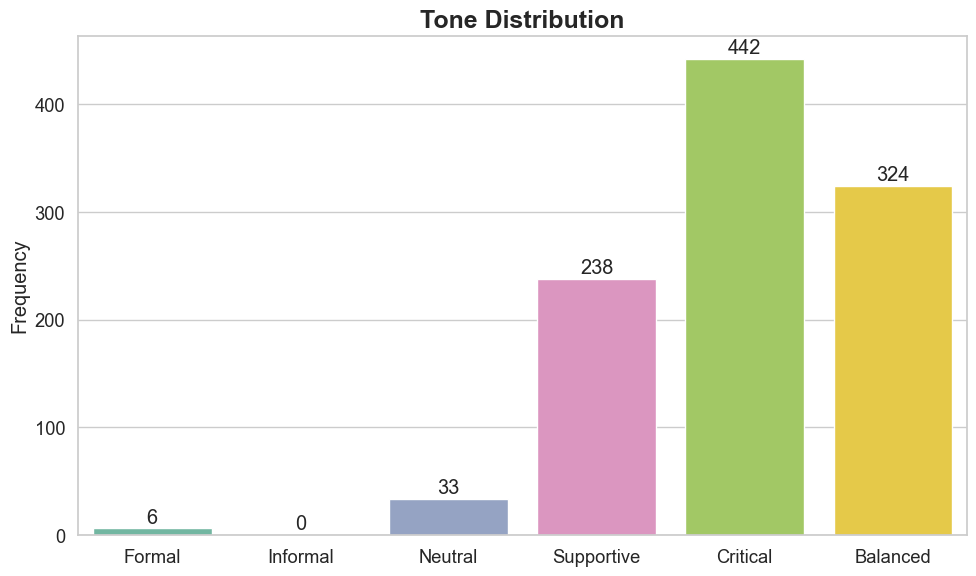

In [6]:
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

tone_labels = ['Formal', 'Informal', 'Neutral', 'Supportive', 'Critical', 'Balanced']
tone_counts = [formal, informal, neutral, supportive, critical, balanced]

tone_df = pd.DataFrame({'Tone': tone_labels, 'Count': tone_counts})

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=tone_df, x='Tone', y='Count', palette='Set2')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center',
                     xytext = (0, 8), 
                     textcoords = 'offset points')

plt.title("Tone Distribution", fontsize=18, weight='bold')
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
# Critical tone dominates the dataset, followed by balanced and supportive.
# Small instances of Neutral and Formal tone.
# Informal tone is completely absent.

In [8]:
flattened_tones = []
flattened_reasons = []

for tones, reasons in zip(data['tone'], data['tone_reason']):
    for tone, reason in zip(tones, reasons):
        flattened_tones.append(tone)
        flattened_reasons.append(reason)

# Now create the DataFrame
tone_reason_df = pd.DataFrame({
    'tone': flattened_tones,
    'tone_reason': flattened_reasons
})

tone_reason_df.head()

,tone,tone_reason
0,Critical,"The review uses phrases like 'misleading,' 'in..."
1,Neutral,The language is polite and professional ('than...
2,Balanced,The review provides both strengths and weaknes...
3,Supportive,The reviewer's expression of gratitude and wil...
4,Critical,The reviewer points out discrepancies in the r...


# Wordcloud

In [9]:
%pip install --quiet wordcloud

Note: you may need to restart the kernel to use updated packages.


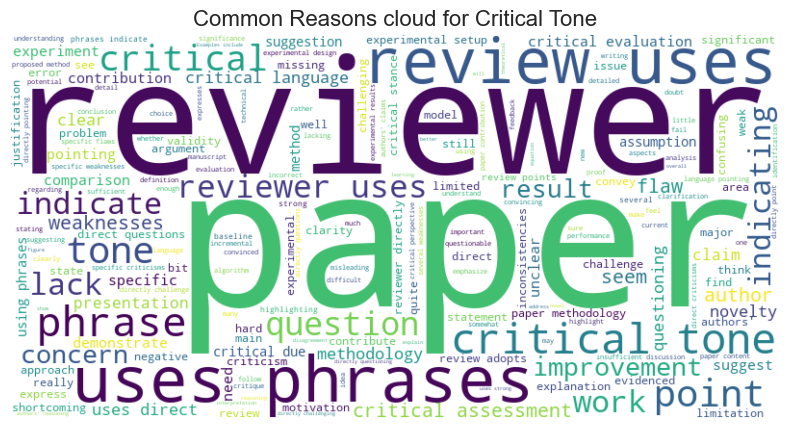

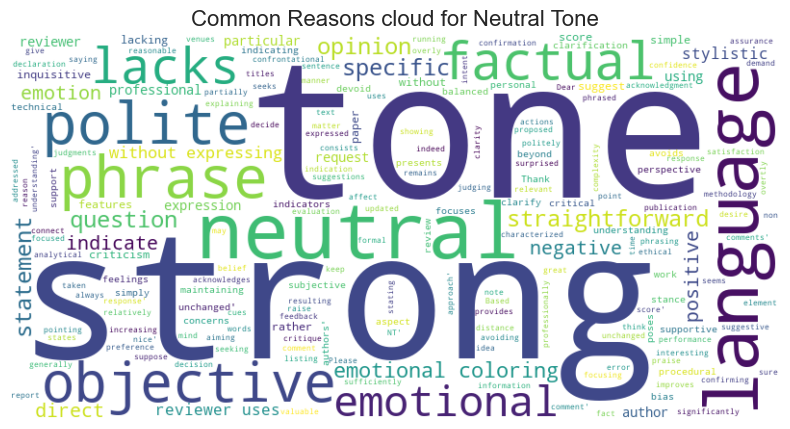

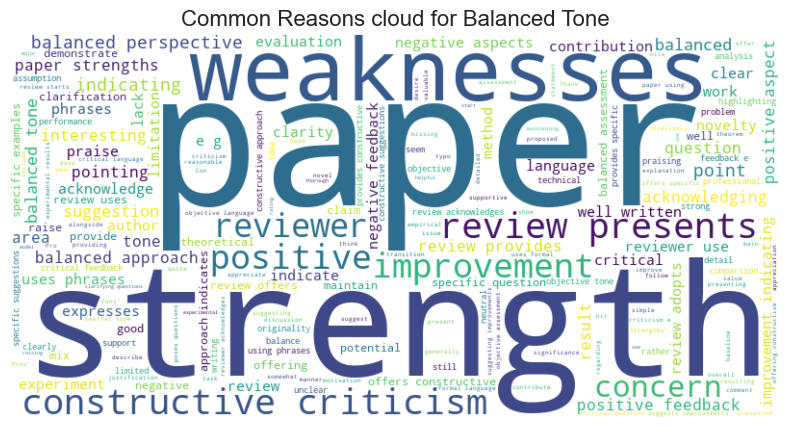

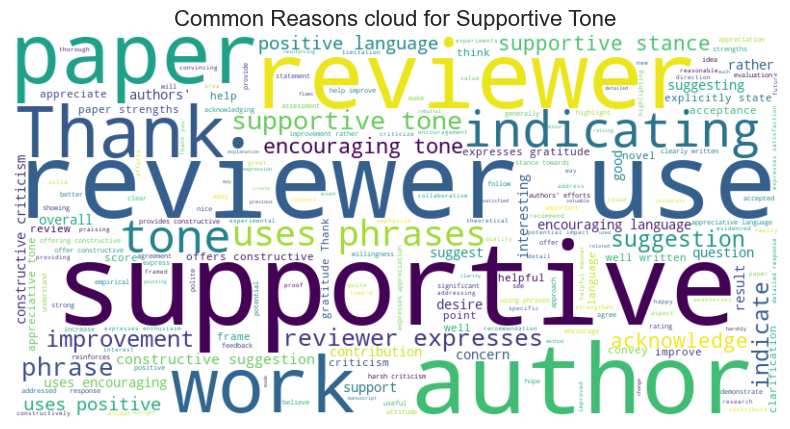

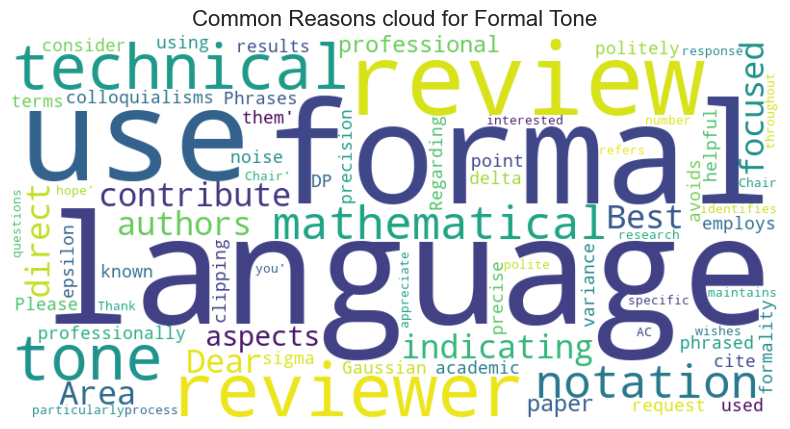

In [10]:
from wordcloud import WordCloud

for tone in tone_reason_df['tone'].unique():
    reasons = ' '.join(tone_reason_df[tone_reason_df['tone'] == tone]['tone_reason'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(reasons)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Common Reasons cloud for {tone} Tone", fontsize=16)
    plt.axis('off')
    plt.show()

# Tone reason length distribution

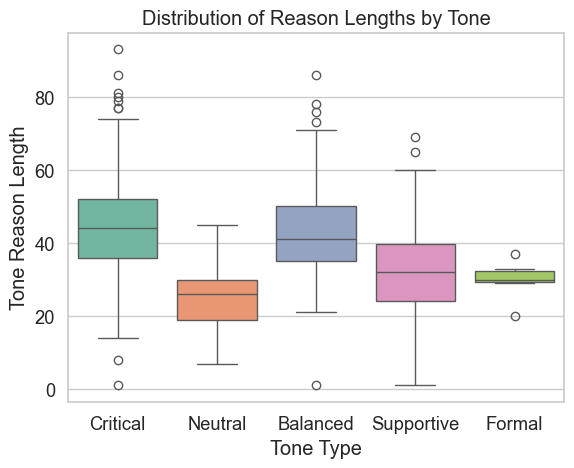

In [13]:
tone_reason_df['reason_length'] = tone_reason_df['tone_reason'].str.split().str.len()

sns.boxplot(data=tone_reason_df, x='tone', y='reason_length', palette='Set2')
plt.title("Distribution of Reason Lengths by Tone")
plt.xticks(rotation=0)
plt.xlabel(xlabel="Tone Type")
plt.ylabel(ylabel="Tone Reason Length")
plt.show()

In [16]:
# Resoning done by LLM for critical tone and balanced tone are nearly of same lengths (40-55 between Q1 and Q3)\\
# While the reasoning lengths for Neutral and Supportive tone is in the range of 30s

In [17]:
max(tone_reason_df['reason_length']), min(tone_reason_df['reason_length']), float(np.median(tone_reason_df['reason_length']))

(93, 1, 40.0)

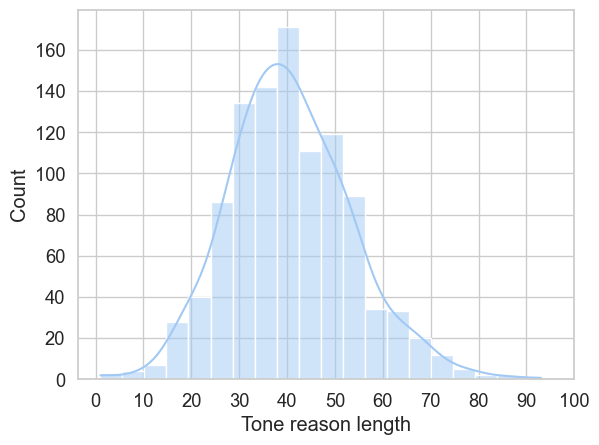

In [15]:
sns.histplot(data=tone_reason_df, x='reason_length', palette='Set2', kde=True, bins=20)
plt.xticks(np.arange(0, 101, 10))
plt.xlabel(xlabel='Tone reason length')
plt.show()

# Basic Tf-Idf modelling to check reason and tone

In [12]:
%pip install --quiet scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = tone_reason_df['tone_reason']
y = tone_reason_df['tone']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Balanced       0.98      0.94      0.96        65
    Critical       0.89      0.98      0.93        88
      Formal       0.00      0.00      0.00         1
     Neutral       1.00      0.14      0.25         7
  Supportive       0.96      0.98      0.97        48

    accuracy                           0.93       209
   macro avg       0.77      0.61      0.62       209
weighted avg       0.93      0.93      0.92       209



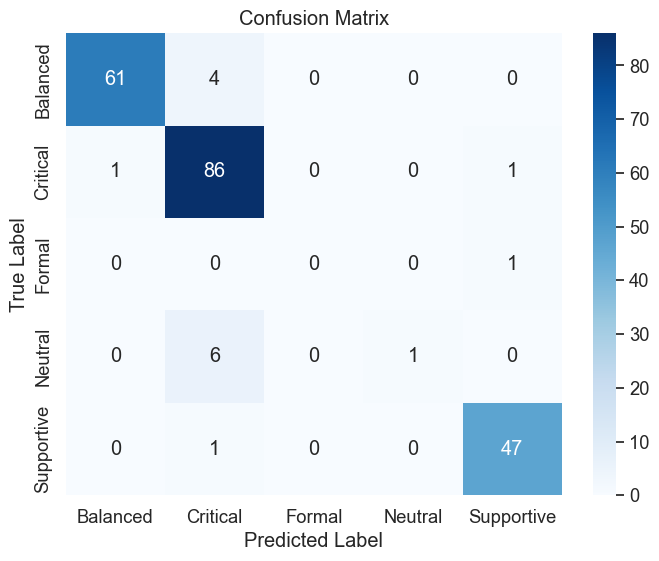

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [22]:
# Even the simplest model (LogReg) can predict the class of tone, provided vectorized tone reasons with 93% accuracy.
# This shows that the tone reason highly match and are realted with tones
# The visualization of the tone reason and tone in 3d space is given below

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Balanced       0.98      0.97      0.98        65
    Critical       0.98      0.98      0.98        88
      Formal       0.00      0.00      0.00         1
     Neutral       1.00      0.86      0.92         7
  Supportive       0.94      1.00      0.97        48

    accuracy                           0.97       209
   macro avg       0.78      0.76      0.77       209
weighted avg       0.97      0.97      0.97       209



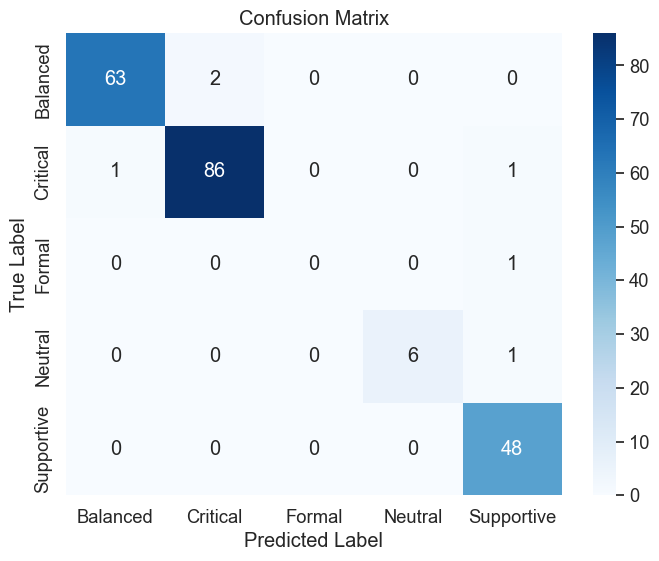

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [25]:
# RandomForest predicts with 97% accuracy and still it is not the best ML model out there.

# TF-IDF - 2D/3D space

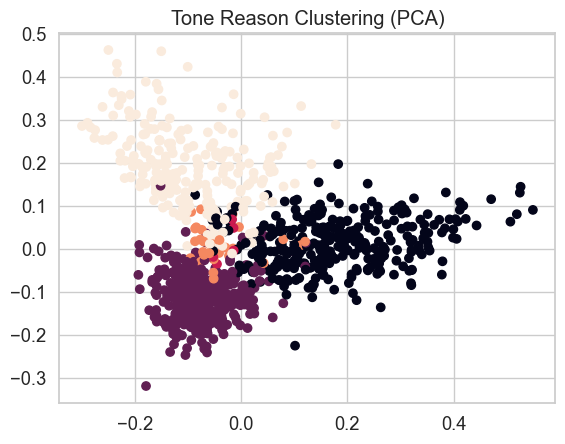

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(tone_reason_df['tone_reason'].fillna(''))
X_pca = PCA(n_components=2).fit_transform(X.toarray())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=tone_reason_df['tone'].astype('category').cat.codes)
plt.title("Tone Reason Clustering (PCA)")
plt.show()

In [29]:
# Tone reasons mapped in 2d space and hue is set to be the tone.
# Clusters are formed for each tone group based on the vectors of the tone reasons.
# Not clear, but 3d space gives some clarity

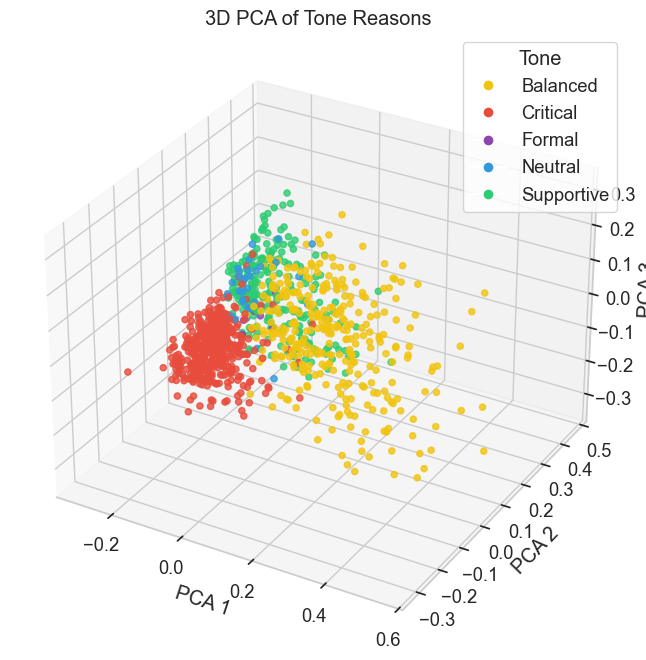

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.lines import Line2D

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(tone_reason_df['tone_reason'].fillna(''))

X_pca_3d = PCA(n_components=3).fit_transform(X.toarray())

manual_color_map = {
    'Balanced': '#F1C40F',   
    'Critical': '#E74C3C',   
    'Formal': '#8E44AD',     
    'Neutral': '#3498DB',    
    'Supportive': '#2ECC71', 
}

tone_series = tone_reason_df['tone']
colors = tone_series.map(manual_color_map)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
           c=colors, alpha=0.8)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D PCA of Tone Reasons")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=tone,
           markerfacecolor=color, markersize=8)
    for tone, color in manual_color_map.items()
    if tone in tone_series.unique()
]

ax.legend(handles=legend_elements, title="Tone")
plt.show()

In [31]:
# The 3d space is used to map the tone reasons vectors with the hue of tone.
# The clusters are more clear in visualization.
# Similarly the 500D space is used for TFIDF to map such results of tone reasons and achieve high accuracy with simple models.